In [2]:
import pandas as pd

데이터 프레임 만들기

In [3]:
subway_201510_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201510.csv", encoding = 'cp949')
subway_201610_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201610.csv", encoding = 'cp949')
subway_201710_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201710.csv", encoding = 'cp949')
subway_201810_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201810.csv", encoding = 'cp949')
subway_201910_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201910.csv", encoding = 'cp949')

In [4]:
subway_202010_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202010.csv", encoding = 'UTF-8')
subway_202110_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202110.csv", encoding = 'UTF-8')
subway_202210_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202210.csv", encoding = 'UTF-8')

데이터프레임 정보 얻기

한칸씩 밀리는 문제 있는 데이터프레임 처리

In [6]:
subway_202010_df = subway_202010_df.loc[:,'노선명':'등록일자']
subway_202110_df = subway_202110_df.loc[:,'노선명':'등록일자']
subway_202210_df = subway_202210_df.loc[:,'노선명':'등록일자']

In [7]:
pd.DataFrame(subway_202010_df).head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20201001,2호선,시청,2118,1605
1,20201001,1호선,청량리(서울시립대입구),6567,6637


In [8]:
subway_202010_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)
subway_202110_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)
subway_202210_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)

In [9]:
dataframes = [subway_201510_df,subway_201610_df,subway_201710_df,subway_201810_df,subway_201910_df,subway_202010_df,subway_202110_df,subway_202210_df]

merge 함수 이용해서 하나의 데이터 프레임 만들기

In [10]:
df_10 = pd.concat(dataframes, axis = 0)
pd.DataFrame(df_10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20151001,경인선,중동,11414.0,10683.0,20151217.0
1,20151001,경인선,온수,8548.0,8035.0,20151217.0
2,20151001,경인선,도원,4430.0,4544.0,20151217.0
3,20151001,경인선,간석,7341.0,7088.0,20151217.0
4,20151001,경인선,부개,11951.0,11093.0,20151217.0
...,...,...,...,...,...,...
18780,20221031,6호선,버티고개,2366.0,2239.0,NaN
18781,20221031,6호선,약수,3778.0,3751.0,NaN
18782,20221031,6호선,청구,3842.0,4067.0,NaN
18783,20221031,6호선,신당,8136.0,8814.0,NaN


In [11]:
df_10['Sum'] = df_10['승차총승객수']+df_10['하차총승객수']

pd.DataFrame(df_10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,Sum
0,20151001,경인선,중동,11414.0,10683.0,20151217.0,22097.0
1,20151001,경인선,온수,8548.0,8035.0,20151217.0,16583.0
2,20151001,경인선,도원,4430.0,4544.0,20151217.0,8974.0
3,20151001,경인선,간석,7341.0,7088.0,20151217.0,14429.0
4,20151001,경인선,부개,11951.0,11093.0,20151217.0,23044.0
...,...,...,...,...,...,...,...
18780,20221031,6호선,버티고개,2366.0,2239.0,NaN,4605.0
18781,20221031,6호선,약수,3778.0,3751.0,NaN,7529.0
18782,20221031,6호선,청구,3842.0,4067.0,NaN,7909.0
18783,20221031,6호선,신당,8136.0,8814.0,NaN,16950.0


이태원역만 포함된 데이터 프레임 만들기
concat() 함수로 이태원 데이터 프레임 만들기
groupby()를 이용해 사용일자의 오른쪽 네 글자가 같은 것을 기준으로 평균치 구하기기

In [12]:
df_10_itw = df_10[df_10['역명']=='이태원']
df_10_itw.sort_values(by = 'Sum',ascending = False).head(10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,Sum
17166,20221029,6호선,이태원,48459.0,81362.0,NaN,129821.0
16570,20151031,6호선,이태원,37666.0,71712.0,20151217.0,109378.0
16103,20171028,6호선,이태원,39662.0,64310.0,20171031.0,103972.0
15665,20181027,6호선,이태원,40276.0,61902.0,20181030.0,102178.0
7558,20181013,6호선,이태원,43183.0,54732.0,20181016.0,97915.0
7792,20171014,6호선,이태원,42625.0,54618.0,20171017.0,97243.0
15215,20191026,6호선,이태원,38619.0,57844.0,20191029.0,96463.0
9015,20151017,6호선,이태원,40597.0,48892.0,20151217.0,89489.0
8113,20161015,6호선,이태원,39703.0,48687.0,20161023.0,88390.0
6949,20191012,6호선,이태원,38648.0,48537.0,20191015.0,87185.0


In [13]:
df_10_itw['일자'] = df_10_itw['사용일자']%10000
pd.DataFrame(df_10_itw).head(20)

<ipython-input-13-0b7310432399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_itw['일자'] = df_10_itw['사용일자']%10000


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,Sum,일자
257,20151001,6호선,이태원,11733.0,13316.0,20151217.0,25049.0,1001
634,20151002,6호선,이태원,16364.0,21844.0,20151217.0,38208.0,1002
1233,20151003,6호선,이태원,21862.0,27679.0,20151217.0,49541.0,1003
2167,20151004,6호선,이태원,16271.0,15242.0,20151217.0,31513.0,1004
2417,20151005,6호선,이태원,13430.0,14743.0,20151217.0,28173.0,1005
2882,20151006,6호선,이태원,14190.0,15420.0,20151217.0,29610.0,1006
3765,20151007,6호선,이태원,15046.0,16376.0,20151217.0,31422.0,1007
4022,20151008,6호선,이태원,16448.0,21482.0,20151217.0,37930.0,1008
4558,20151009,6호선,이태원,24484.0,28522.0,20151217.0,53006.0,1009
5340,20151010,6호선,이태원,19380.0,23676.0,20151217.0,43056.0,1010


In [14]:
df_10_itw.groupby('일자').mean().sort_values(by = 'Sum',ascending = False, inplace = False).head(5)

,사용일자,승차총승객수,하차총승객수,등록일자,Sum
일자,,,,,
1031,20186031.0,23735.000,32468.500,20171126.8,56203.500
1029,20186029.0,22695.750,28395.375,20171125.2,51091.125
1028,20186028.0,20568.000,25079.250,20171083.0,45647.250
1015,20186015.0,20845.125,23392.375,20171058.8,44237.500
1027,20186027.0,19324.500,22905.500,20171082.2,42230.000


In [15]:
df_10_31 = df_10[df_10['사용일자']%10000==1031]
df_10_31.sort_values(by = 'Sum',ascending = False).head(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,Sum
17688,20181031,2호선,강남,110611.0,110664.0,20181103.0,221275.0
17787,20191031,2호선,강남,108061.0,110902.0,20191103.0,218963.0
16860,20151031,2호선,홍대입구,96434.0,121168.0,20151217.0,217602.0
17667,20171031,2호선,강남,105742.0,104916.0,20171103.0,210658.0
17209,20161031,2호선,강남,99256.0,99104.0,20161108.0,198360.0


In [17]:
df_10_31.groupby('역명').mean().sort_values(by = 'Sum',ascending = False, inplace = False).head(5)

,사용일자,승차총승객수,하차총승객수,등록일자,Sum
역명,,,,,
강남,2.018603e+07,86248.125000,87333.625000,20171126.8,173581.750000
강변,2.015103e+07,60977.000000,61505.000000,20151217.0,122482.000000
구로디지털단지,2.018603e+07,58410.750000,58101.750000,20171126.8,116512.500000
신림,2.018992e+07,59072.444444,57145.666667,20171126.8,116218.111111
잠실,2.015103e+07,56342.000000,51242.000000,20151217.0,107584.000000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
vis_col = ['Sum','일자']

for col in vis_col:
  print(df_10_itw[col].describe())

count       248.000000
mean      34987.830645
std       18760.592420
min       11025.000000
25%       23498.000000
50%       30410.000000
75%       40246.500000
max      129821.000000
Name: Sum, dtype: float64
count     248.000000
mean     1016.000000
std         8.962359
min      1001.000000
25%      1008.000000
50%      1016.000000
75%      1024.000000
max      1031.000000
Name: 일자, dtype: float64


In [23]:
df_10_itw[vis_col]

,Sum,일자
257,25049.0,1001
634,38208.0,1002
1233,49541.0,1003
2167,31513.0,1004
2417,28173.0,1005
...,...,...
16163,28549.0,1027
16590,59783.0,1028
17166,129821.0,1029
17888,21753.0,1030


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


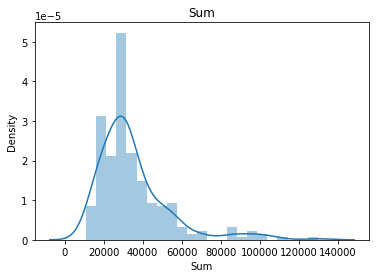

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  fo

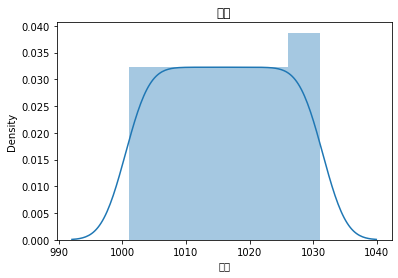

In [20]:
import scipy.stats as stats

for col in vis_col:
    sns.distplot(df_10_itw.loc[df_10_itw[col].notnull(), col])
    plt.title(col)
    plt.show()

            사용일자    승차총승객수    하차총승객수      등록일자        합계        일자
사용일자    1.000000 -0.330333 -0.286620  0.999993 -0.309526  0.000390
승차총승객수 -0.330333  1.000000  0.930166  0.052378  0.974907  0.210212
하차총승객수 -0.286620  0.930166  1.000000  0.024894  0.988555  0.206824
등록일자    0.999993  0.052378  0.024894  1.000000  0.036714  0.001278
합계     -0.309526  0.974907  0.988555  0.036714  1.000000  0.211784
일자      0.000390  0.210212  0.206824  0.001278  0.211784  1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_

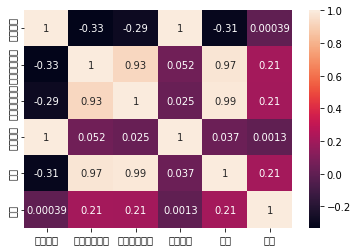

In [ ]:
df_corr = df_10_itw.corr()
print(df_corr)
sns.heatmap(df_corr, annot=True)
plt.show()